# Problem 1 - Model Predictive Control

Creates the Quadrotor object and loads in the animation code.

**Re-run this block anytime you make change to `quadrotor.py`.**

## Simulate the quadrotor using MPC as the controller


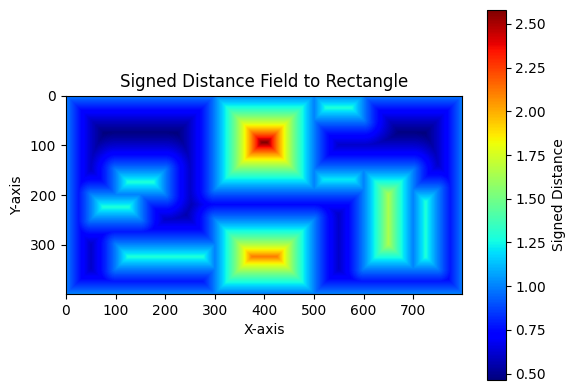

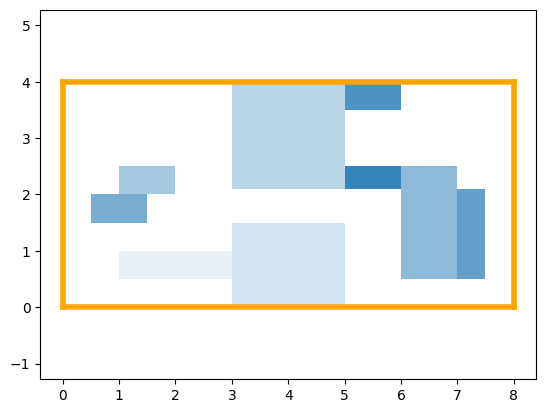

In [1]:
from lqrrt import PathPlannerLQRRT

from quadrotor import QuadrotorPendulum
from animation import Animation

from world import SignedDistanceField
import matplotlib.pyplot as plt

import numpy as np

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
tf = 10

# Construct our quadrotor controller 
x0 = np.array([2, 3, 0, 0, 0, 0, 0, 0])
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quadrotor = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
sdf = SignedDistanceField("./configs/world_maze.yaml")


sdf.plot_barrier()
sdf.plot_obs(plt.gca())

plt.axis('equal')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc24b42c-2384-48c3-b1e2-6f6c0205f5f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [6]:
from lqrrt import PathPlannerLQRRT

from quadrotor import QuadrotorPendulum
from animation import Animation

from world import SignedDistanceField
import matplotlib.pyplot as plt

import numpy as np

R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quad = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)

suffix = ""
sdf = SignedDistanceField("./configs/world%s.yaml" % suffix)

rrt = PathPlannerLQRRT("./configs/lqrrt.yaml", quad, sdf)
planner = rrt.get_planner()
x, u = rrt.get_trajectory(planner)
#x, u = rrt.interpolate_trajectory(planner, 0.3)
print(x.shape)

np.save("./initial_guesses/x%s.npy" % suffix, x)
np.save("./initial_guesses/u%s.npy" % suffix, u)

anime = Animation(quad, sdf)
anime.set_trajectory(x)
anime.animate()


...planning...
Found plan at elapsed time: 2.790297 s
Tree size: 7
ETA: 63.1 s
lqr success rate: 30.00%
(1262, 8)


In [5]:
from ilqr import iLQR
from lqrrt import PathPlannerLQRRT

import numpy as np
from quadrotor import QuadrotorPendulum
from world import SignedDistanceField

R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = 100 * Q

# End time of the simulation
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quad = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
suffix = "_complex"
sdf = SignedDistanceField("./configs/world%s.yaml" % suffix)

rrt = PathPlannerLQRRT("./configs/lqrrt.yaml", quad, sdf)
optim = iLQR("./configs/ilqr.yaml", rrt)

x = np.load("./initial_guesses/x%s.npy" % suffix)
u = np.load("./initial_guesses/u%s.npy" % suffix)
print(x.shape)


xx, uu = optim.calculate_optimal_trajectory(x[0], rrt.xf, u, rrt.dt)
np.save("./results/xx%s.npy" % suffix, xx)
np.save("./results/uu%s.npy" % suffix, uu)

(4858, 8)
[iter-0]	J: 67.107
[iter-1]	J: 34.580
[iter-2]	J: 24.312
[iter-3]	J: 19.691
[iter-4]	J: 17.314
[iter-5]	J: 15.288
[iter-6]	J: 14.191
[iter-7]	J: 12.861
[iter-8]	J: 12.340
[iter-9]	J: 11.462
[iter-10]	J: 11.267
[iter-11]	J: 10.556
[iter-12]	J: 10.778
[iter-13]	J: 10.024
[iter-14]	J: 9.783
[iter-15]	J: 9.209
[iter-16]	J: 9.359
[iter-17]	J: 8.795
[iter-18]	J: 8.621
[iter-19]	J: 8.213
[iter-20]	J: 8.272
[iter-21]	J: 7.879
[iter-22]	J: 8.085
[iter-23]	J: 7.598
[iter-24]	J: 7.716
[iter-25]	J: 7.333
[iter-26]	J: 7.539
[iter-27]	J: 7.054
[iter-28]	J: 7.147
[iter-29]	J: 6.715
[iter-30]	J: 6.799
[iter-31]	J: 6.473
[iter-32]	J: 7.289
[iter-33]	J: 6.448
[iter-34]	J: 6.558
[iter-35]	J: 6.115
[iter-36]	J: 6.313
[iter-37]	J: 5.932
[iter-38]	J: 6.572
[iter-39]	J: 5.999
[iter-40]	J: 6.188
[iter-41]	J: 5.780
[iter-42]	J: 6.357
[iter-43]	J: 5.800
[iter-44]	J: 5.919
[iter-45]	J: 5.523
[iter-46]	J: 6.017
[iter-47]	J: 5.522
[iter-48]	J: 5.745
[iter-49]	J: 5.324
[iter-50]	J: 5.818
[iter-51]	J: 5.31

In [6]:
from animation import Animation
anime = Animation(quad, sdf)
anime.set_trajectory(xx)
anime.animate()

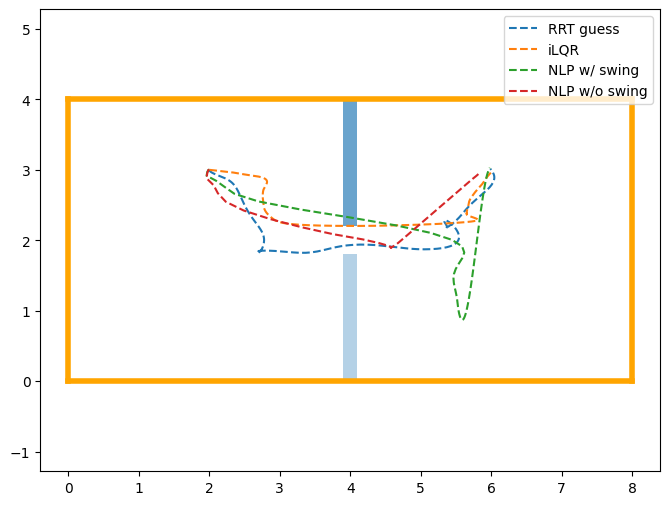

In [1]:
import numpy as np
from world import *


suffix = ""
sdf = SignedDistanceField("./configs/world%s.yaml" % suffix)

trajs = {}
trajs["RRT guess"] = np.load("./initial_guesses/x%s.npy" % suffix)
trajs["iLQR"] = np.load("./results/xx%s.npy" % suffix)
trajs["NLP w/ swing"] = np.load("./results/x_NLP.npy")
trajs["NLP w/o swing"] = np.load("./results/x_NLP_no_swing.npy")

sdf.plot_trajectories(trajs)